In [1]:
%cd ..

/Users/maimai/Desktop/project/May


In [2]:
import builtins
builtins.uclresearch_topic = 'GIVENCHY'
# builtins.uclresearch_topic = 'HAWKING'
# builtins.uclresearch_topic = 'NYC'
# builtins.uclresearch_topic = 'FLORIDA'
from configuration import config
from configuration import dzcnapy_plotlib as dzcnapy
from tqdm import tqdm
import os
import pickle
import math
import numpy as np
import networkx as nx
import pandas as pd
from collections import Counter
import operator

# Plotting
import matplotlib
# # matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from scipy.interpolate import spline

# Networkx
from networkx.drawing.nx_agraph import graphviz_layout


('Reading config file from location: '
 '/Users/maimai/Desktop/project/May/configuration/env.properties')
{'calculate': {'analysis': True,
               'network': True,
               'uniquetweets': True,
               'uniqueusers': True},
 'data': {'dates': ['2018-03-11', '2018-03-12', '2018-03-13'],
          'eventname': "Givenchy's Death",
          'phrases': ['givenchy%20death', 'givenchy%20passed%20away'],
          'starttime': 'Mar 12 08:20:00 -0500 2018'},
 'path': {'crawl': {'followers': '/Users/maimai/Desktop/project/May/followers',
                    'friends': '/Users/maimai/Desktop/project/May/friends'},
          'cwd': '/Users/maimai/Desktop/project/May/data/givenchy',
          'ml': '/Users/maimai/Desktop/project/May/data/givenchy/pickle',
          'networkx': {'all': '/Users/maimai/Desktop/project/May/data/givenchy/pickle/networkx_all.dat',
                       'friends': '/Users/maimai/Desktop/project/May/data/givenchy/pickle/networkx_friends.dat',
       

In [3]:
n_bytes = 2**31
max_bytes = 2**31 - 1

path = "/Users/maimai/Desktop/project/May/data/givenchy/pickle"  

def write_to_pickle(file_path, data):

    bytes_out = pickle.dumps(data)
    with open(file_path, 'wb') as f_out:
        for idx in range(0, n_bytes, max_bytes):
            f_out.write(bytes_out[idx:idx+max_bytes])

def load_pickle(file_path):
    bytes_in = bytearray(0)
    input_size = os.path.getsize(file_path)
    with open(file_path, 'rb') as f_in:
        for _ in range(0, input_size, max_bytes):
            bytes_in += f_in.read(max_bytes)
    return pickle.loads(bytes_in)

In [4]:
################# 10 cases ###################
################# 10 cases ###################
A_single = load_pickle(path+'/Stanford_network_simulation_0.6_a.pkl')
B_sequential = load_pickle(path+'/Stanford_network_simulation_0.6_b_new.pkl')
C_sequential = load_pickle(path+'/Stanford_network_simulation_0.6_c_new.pkl')

Cen_Degree = load_pickle(path+'/Stanford_network_simulation_Degree_5.pkl')
Cen_Betweenness = load_pickle(path+'/Stanford_network_simulation_betweenness_5.pkl')
Cen_Eigencentrality = load_pickle(path+'/Stanford_network_simulation_eigencentrality_5.pkl')

Active_low = load_pickle(path+'/Stanford_network_simulation_active_low.pkl')
Active_high = load_pickle(path+'/Stanford_network_simulation_active_high.pkl')

# Dynamic = load_pickle(path+'/Stanford_network_simulation_active_low.pkl')
# Combined = load_pickle(path+'/Stanford_network_simulation_active_low.pkl')

In [15]:
name = [A_single, B_sequential, C_sequential,
        Cen_Degree, Cen_Betweenness, Cen_Eigencentrality,
        Active_low]
# a=[0,1,2,3,4,5]

# for i in range(0,6):
#     count = len(unique_users[unique_users.generations.isin([i])])
#     print(count)

# time = unique_users['time_lapsed'].unique()
# time


for i in range(0,7):
    for j in range(0,11):
        count = len(name[i][name[i].generations.isin([j])])
        time_lapsed = name[i]['time_lapsed'].unique()
        print(count)
    print(time_lapsed)
    print()
    print(" ")


20 [0 4 5 6 nan 3 7 2 1]
138 [0 4 5 6 nan 3 7 2 1]
810 [0 4 5 6 nan 3 7 2 1]
1822 [0 4 5 6 nan 3 7 2 1]
3959 [0 4 5 6 nan 3 7 2 1]
10158 [0 4 5 6 nan 3 7 2 1]

 
20 [3 5 6 nan 4 2 0 1]
280 [3 5 6 nan 4 2 0 1]
2016 [3 5 6 nan 4 2 0 1]
4857 [3 5 6 nan 4 2 0 1]
4437 [3 5 6 nan 4 2 0 1]
7883 [3 5 6 nan 4 2 0 1]

 
20 [0 4 5 6 nan 3 1 2]
290 [0 4 5 6 nan 3 1 2]
2286 [0 4 5 6 nan 3 1 2]
4432 [0 4 5 6 nan 3 1 2]
7695 [0 4 5 6 nan 3 1 2]
11803 [0 4 5 6 nan 3 1 2]

 


/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  # Remove the CWD from sys.path while we load stuff.
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  # This is added back by InteractiveShellApp.init_path()
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  if sys.path[0] == '':


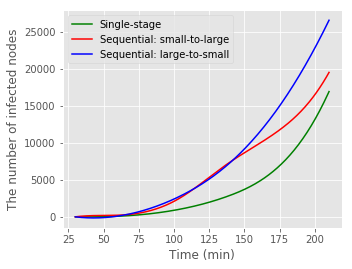

In [20]:
with plt.style.context(('ggplot')):
    plt.figure(figsize=(5,4))
#     x=np.linspace(30,150,5)
    x=np.linspace(30,210,6)
    y1=[20,158,968,2790,6749,16907]
    y2=[20,300,2316,7173,11610,19493]
    y3=[20,310,2596,7028,14723,26526]
    
    xnew = np.linspace(x.min(),x.max(),300)
    y11 = spline(x,y1,xnew)
    y22 = spline(x,y2,xnew)
    y33 = spline(x,y3,xnew)
    plt.plot(xnew,y11,color='green',label='Single-stage')
    plt.plot(xnew,y22,color='red',label='Sequential: small-to-large')
    plt.plot(xnew,y33,color='blue',label='Sequential: large-to-small')
    

    #     ax.plot(rf.FPR, rf.TPR, color = 'red', label = 'RF: '+str(rf.AUC))
    #     ax.plot(lr.FPR, lr.TPR, color = 'black', label = 'LR: '+str(lr.AUC))
    
    plt.xlabel('Time (min)')
    plt.ylabel('The number of infected nodes')
    plt.legend(loc='upper left')
    #plt.title("ROC against different CTR models")

    plt.show()
    #     plt.savefig("models.png")